# Stress Predcition Hackerton
## feature importance : SHAP, feature importance, gini index, permutation importance
## missing value : missforest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
train = pd.read_csv('C:/Users/hananthony1/.vscode/lab_git/vscode/datafile/dacon/basic_stress_prediction/train.csv')
test = pd.read_csv('C:/Users/hananthony1/.vscode/lab_git/vscode/datafile/dacon/basic_stress_prediction/test.csv')
sample_submission = pd.read_csv('C:/Users/hananthony1/.vscode/lab_git/vscode/datafile/dacon/basic_stress_prediction/sample_submission.csv')

train.shape, test.shape, sample_submission.shape

((3000, 18), (3000, 17), (3000, 2))

<Axes: >

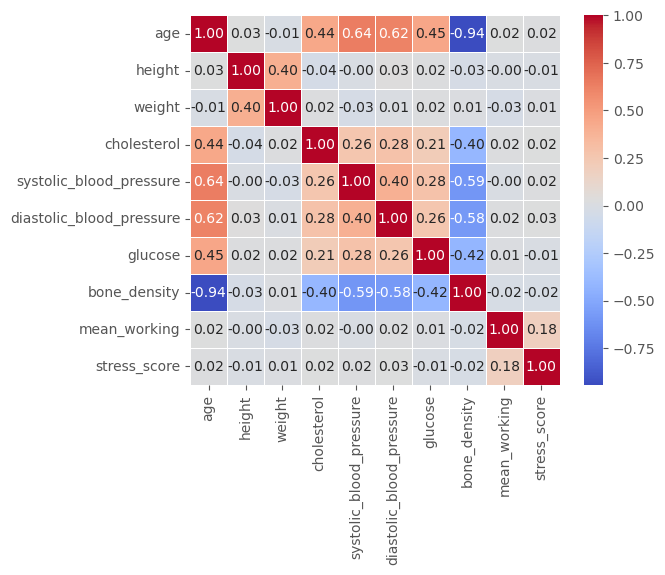

In [22]:
sns.heatmap(train.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=0.5)

In [3]:
df_train = train.copy()
df_test = test.copy()

df_train.drop(columns=['ID'], inplace=True)
df_test.drop(columns=['ID'], inplace=True)

In [ ]:
# # age_level column
# df_train['age_level'] = df_train['age'] / 10
# for i in range(1, 8):
#     df_train.loc[(df_train['age_level'] >= i) & (df_train['age_level'] < i + 1), 'age_level'] = i
# df_train['age_level'] = df_train['age_level'].astype(int)

# df_test['age_level'] = df_test['age'] / 10
# for i in range(1, 8):
#     df_test.loc[(df_test['age_level'] >= i) & (df_test['age_level'] < i + 1), 'age_level'] = i
# df_test['age_level'] = df_test['age_level'].astype(int)

In [ ]:
# high_blood_pressure
# for i in range(len(df_train)):
#     if df_train.loc[i,'systolic_blood_pressure'] >= 140 or df_train.loc[i,'diastolic_blood_pressure'] >= 90:
#         df_train.loc[i,'hypertension'] = 1
#     else:
#         df_train.loc[i,'hypertension'] = 0
        
# for i in range(len(df_test)):
#     if df_test.loc[i,'systolic_blood_pressure'] >= 140 or df_test.loc[i,'diastolic_blood_pressure'] >= 90:
#         df_test.loc[i,'hypertension'] = 1
#     else:
#         df_test.loc[i,'hypertension'] = 0

In [28]:
high_stress = df_train.loc[df_train['stress_score'] >= 0.5]

<Axes: >

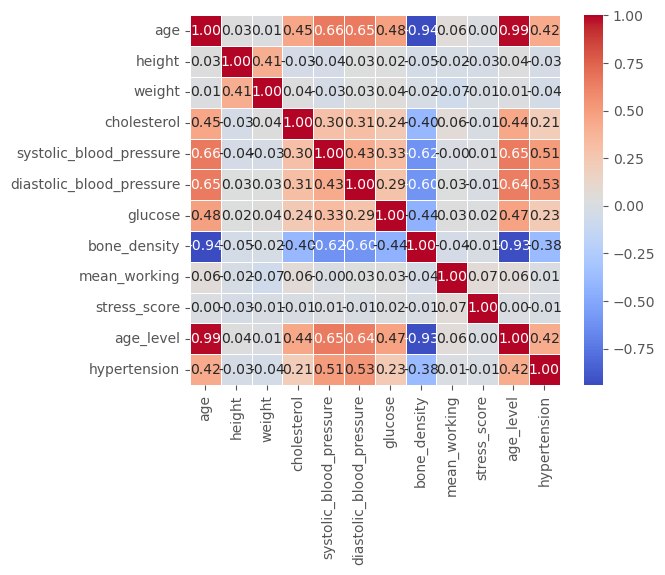

In [30]:
sns.heatmap(high_stress.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=0.5)

<Axes: xlabel='age', ylabel='glucose'>

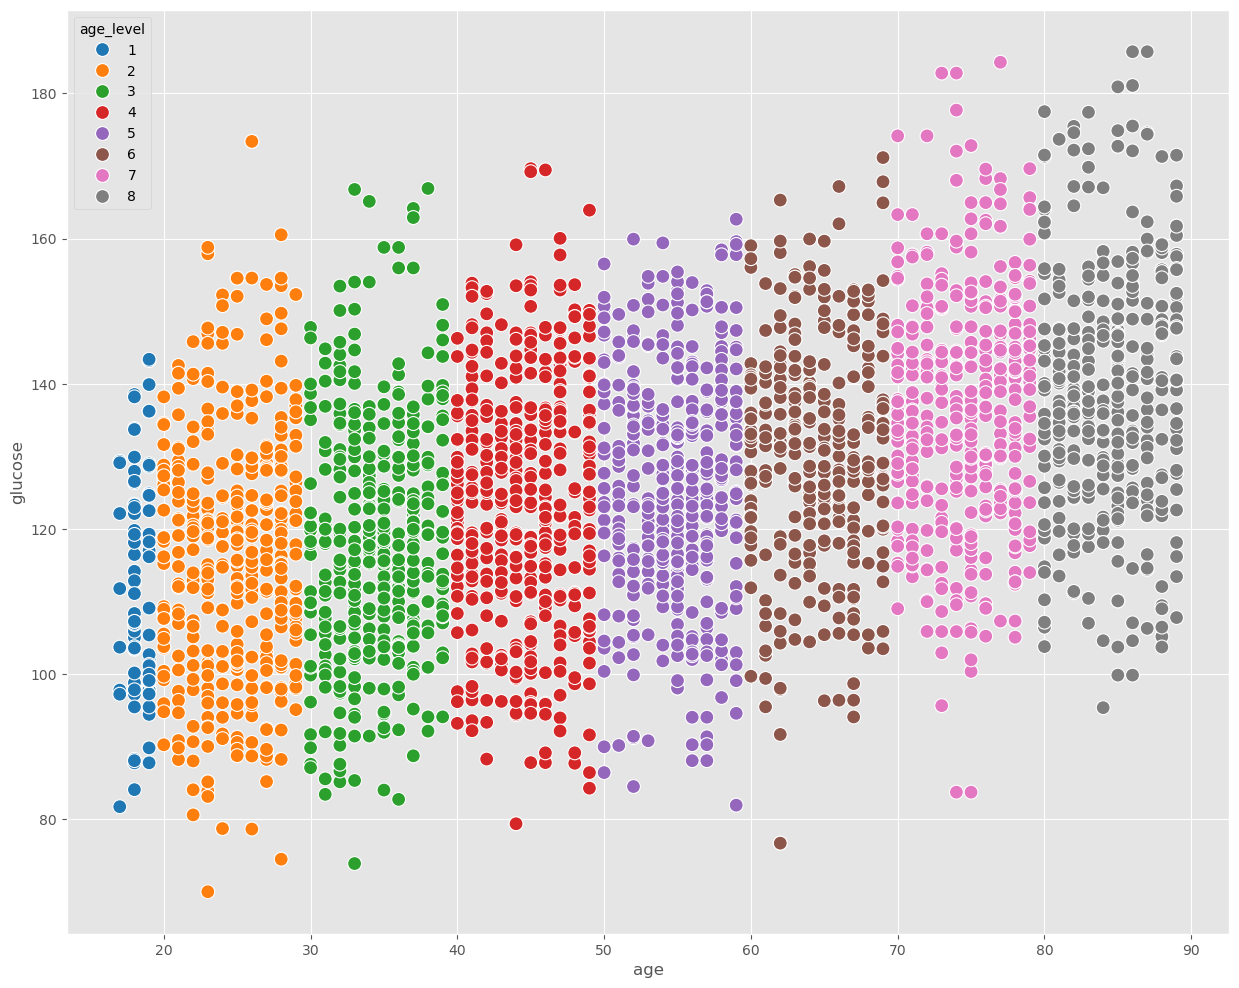

In [15]:
plt.figure(figsize=(15, 12))
sns.scatterplot(data=df_train, x='age', y='glucose', hue='age_level', palette='tab10', s=100)

<Axes: xlabel='medical_history', ylabel='stress_score'>

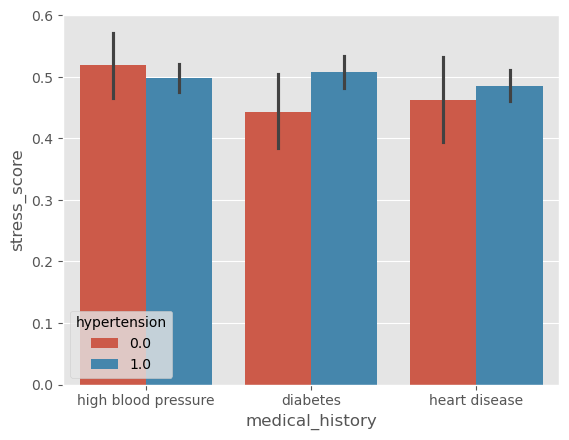

In [ ]:
sns.barplot(data=df_train, x='medical_history', y='stress_score',hue='hypertension')

<Axes: >

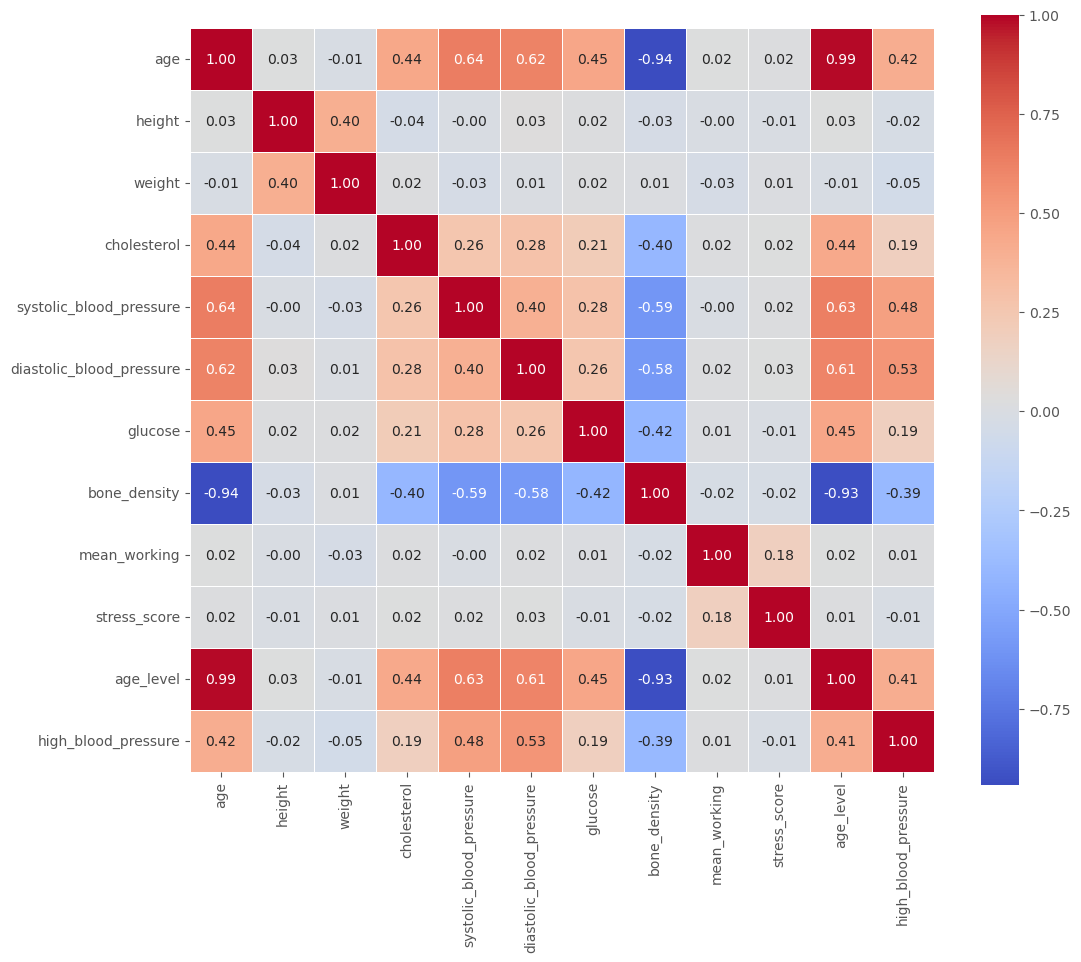

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(df_train.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=0.7)

In [89]:
# # High VIF features must be removed
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# vif = pd.DataFrame()
# vif['VIF'] = [variance_inflation_factor(df_train.select_dtypes(include=['float64','int64']).values, i) for i in range(df_train.select_dtypes(include=['float64','int64']).shape[1])]
# vif['features'] = df_train.select_dtypes(include=['float64','int64']).columns
# vif.sort_values(by='VIF', ascending=False)

In [4]:
cat_col_tr = df_train.select_dtypes(include='object').columns
cat_col_te = df_test.select_dtypes(include='object').columns

<Axes: >

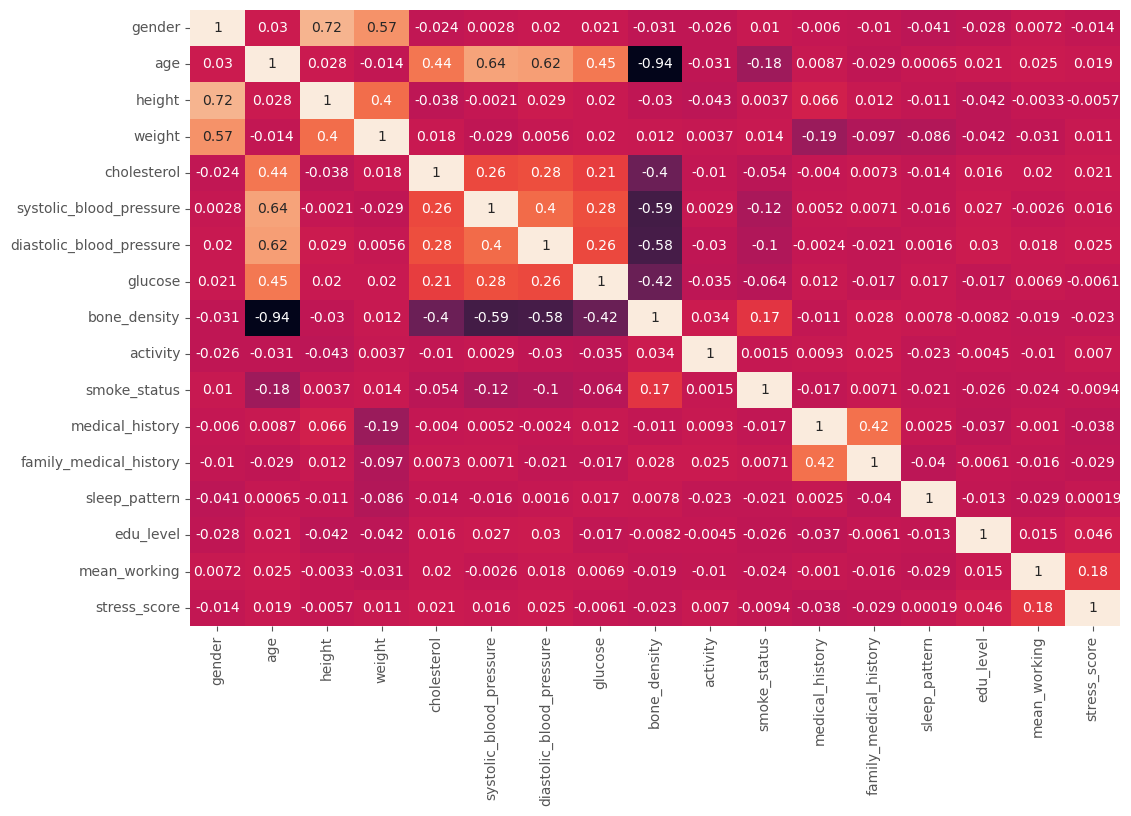

In [5]:
df_train[cat_col_tr] = df_train[cat_col_tr].astype('category')
df_test[cat_col_te] = df_test[cat_col_te].astype('category')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_col_tr:
    df_train[col] = le.fit_transform(df_train[col])

plt.figure(figsize=(12,8))
sns.heatmap(df_train.corr(), cbar=False,annot=True,)  # No missing values in train set

In [93]:
# from missforest import MissForest
# from sklearn.model_selection import train_test_split

# mf = MissForest(categorical=cat_col_tr.tolist())
# mf.fit(x=df_train)
# df_train_imputed = mf.transform(df_train)

# mf = MissForest(categorical=cat_col_te.tolist())
# mf.fit(x=df_test)
# df_test_imputed = mf.transform(df_test)

In [94]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# numeric_col_tr = df_train.select_dtypes(include=['float64','int64']).columns
# numeric_col_te = df_test.select_dtypes(include=['float64','int64']).columns

# imp = IterativeImputer(max_iter=10, random_state=42)
# mean_value_imputed_train = imp.fit_transform(df_train[numeric_col_tr])
# df_train[numeric_col_tr] = mean_value_imputed_train

# mean_value_imputed_test = imp.fit_transform(df_test[numeric_col_te])
# df_test[numeric_col_te] = mean_value_imputed_test

In [15]:
#missing values filling
for col in ['mean_working']:
    df_train[col] = df_train[col].fillna(df_train[col].mean())
    df_test[col] = df_train[col].fillna(df_test[col].mean())

for col in []:
    df_train[col] = df_train[col].fillna(df_train[col].mode()[0])
    df_test[col] = df_train[col].fillna(df_test[col].mode()[0])

# df_train = pd.get_dummies(df_train, columns=cat_col_tr, drop_first=True)
# df_test = pd.get_dummies(df_test, columns=cat_col_te, drop_first=True)

# Models + Submission

## LightGBM
### baseline



In [16]:
# 3-Fold CV with LGBM
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold

X = df_train.drop(columns=['stress_score'])
y= df_train['stress_score']

folds = KFold(n_splits=3, shuffle=True, random_state=42)
val_scores = []
results = []

for idx,(train_idx,val_idx) in enumerate(folds.split(X,y)):
    print(f'Fold {idx+1} / Fold {folds.n_splits}')
    X_train,y_train = X.iloc[train_idx],y.iloc[train_idx]
    X_val,y_val = X.iloc[val_idx],y.iloc[val_idx]

    print(f'Data Shape:{X_train.shape,y_train.shape,X_val.shape,y_val.shape}\n')

    lgb = LGBMRegressor(random_state=42,enable_categorical=True)
    lgb.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_val,y_val)])
    
    lgb_train_pred = lgb.predict(X_train)
    lgb_val_pred = lgb.predict(X_val)

    print(f'Train MAE: {mean_absolute_error(y_train,lgb_train_pred):.5f}')
    print(f'Val MAE: {mean_absolute_error(y_val,lgb_val_pred):.5f}')
    print('-'*30)

    val_scores.append(mean_absolute_error(y_val,lgb_val_pred))
    results.append(lgb.evals_result_)

print(f'MAE: {np.array(val_scores).mean()}')

Fold 1 / Fold 3
Data Shape:((2000, 17), (2000,), (1000, 17), (1000,))

[LightGBM] [Warning] Unknown parameter: enable_categorical
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: enable_categorical
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1420
[LightGBM] [Info] Number of data points in the train set: 2000, number of used features: 17
[LightGBM] [Warning] Unknown parameter: enable_categorical
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 0.483445
[LightGBM] [Warning] Unknown parameter: enable_categorical
[LightGBM] [Warning] Unknown parameter: enable_categorical
Train MAE: 0.11800
Val MAE: 0.21416
------------------------------
Fo

### submission


## RandomForest
### baseline

In [97]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MaxAbsScaler,StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state=42))
])

X = df_train.drop(columns=['stress_score'])
y= df_train['stress_score']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
print(f'Mean Absolute Error: {mae:.4f}')

Mean Absolute Error: 0.1871


### submission

In [42]:
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state=42))
])

pipe.fit(X, y)
y_test = pipe.predict(df_test)

In [104]:
sample_submission['stress_score'] = y_test
sample_submission.to_csv('rf_drop_various.csv', index=False)

## XGBoost
### Baseline

In [6]:
# 3-Fold CV with XGBoost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold

X = df_train.drop(columns=['stress_score'])
y= df_train['stress_score']

folds = KFold(n_splits=3, shuffle=True, random_state=42)
val_scores = []
results = []

for idx,(train_idx,val_idx) in enumerate(folds.split(X,y)):
    print(f'Fold {idx+1} / Fold {folds.n_splits}')
    X_train,y_train = X.iloc[train_idx],y.iloc[train_idx]
    X_val,y_val = X.iloc[val_idx],y.iloc[val_idx]

    print(f'Data Shape:{X_train.shape,y_train.shape,X_val.shape,y_val.shape}\n')

    xgb = XGBRegressor(random_state=42,enable_categorical=True)
    xgb.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_val,y_val)],verbose=False)
    
    xgb_train_pred = xgb.predict(X_train)
    xgb_val_pred = xgb.predict(X_val)

    print(f'Train MAE: {mean_absolute_error(y_train,xgb_train_pred):.5f}')
    print(f'Val MAE: {mean_absolute_error(y_val,xgb_val_pred):.5f}')
    print('-'*30)

    val_scores.append(mean_absolute_error(y_val,xgb_val_pred))
    results.append(xgb.evals_result())

print(f'MAE: {np.array(val_scores).mean()}')

Fold 1 / Fold 3
Data Shape:((2000, 16), (2000,), (1000, 16), (1000,))

Train MAE: 0.03305
Val MAE: 0.20048
------------------------------
Fold 2 / Fold 3
Data Shape:((2000, 16), (2000,), (1000, 16), (1000,))

Train MAE: 0.03042
Val MAE: 0.21540
------------------------------
Fold 3 / Fold 3
Data Shape:((2000, 16), (2000,), (1000, 16), (1000,))

Train MAE: 0.03146
Val MAE: 0.20917
------------------------------
MAE: 0.20834721733017514


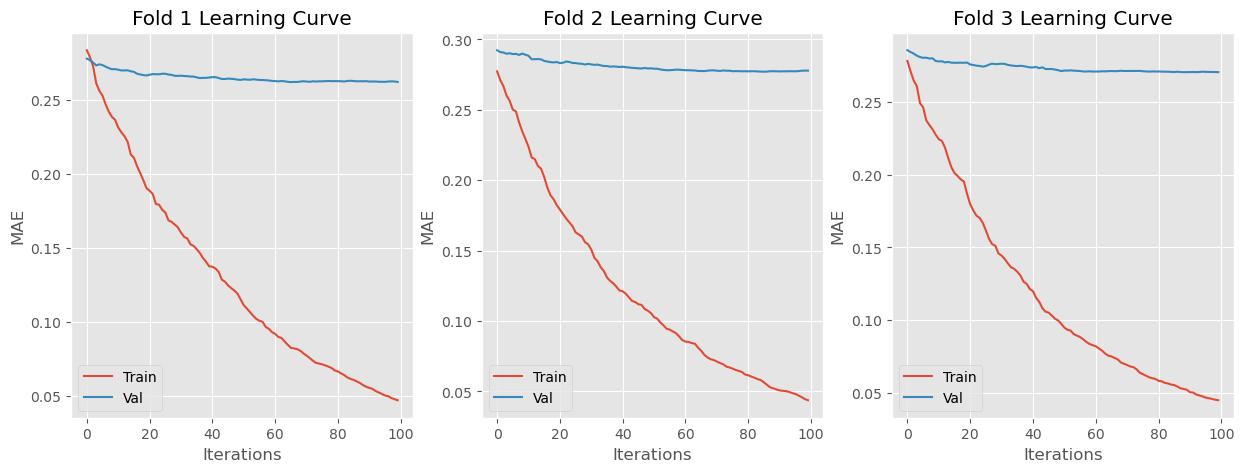

In [7]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
for idx,result in enumerate(results):
    ax[idx].plot(result['validation_0']['rmse'], label='Train')
    ax[idx].plot(result['validation_1']['rmse'], label='Val')
    ax[idx].set_xlabel('Iterations')
    ax[idx].set_ylabel('MAE')
    ax[idx].legend()
    ax[idx].set_title(f'Fold {idx+1} Learning Curve')

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

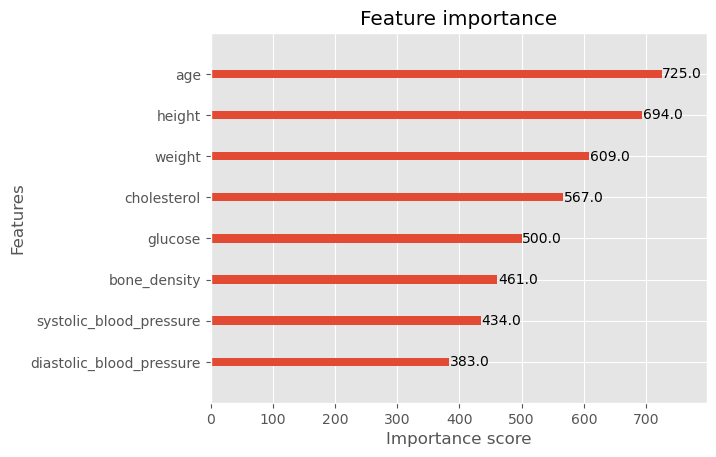

In [ ]:
from xgboost import plot_importance
plot_importance(xgb)

In [16]:
from optuna import Trial, create_study
from optuna.samplers import TPESampler
import optuna

X = df_train.drop(columns=['stress_score'])
y= df_train['stress_score']

def objectivexgb(trial:Trial,X,y):
    from sklearn.model_selection import train_test_split
    X_train_op,y_train_op,X_val_op,y_val_op = train_test_split(X,y,test_size=0.15,random_state=2025)
    
    global xgb_param
    xgb_param = {'random_state':2025,
                 'objective':'reg:squarederror',
                 'learning_rate':trial.suggest_float('learning_rate',0.01,0.3)}
    model = XGBRegressor(**xgb_param)
    model.fit(X_train_op,y_train_op,eval_set=[(X_val_op,y_val_op)])
    
    answer = model.predict(X_val_op)
    score = mean_absolute_error(answer,y_val_op)
    
    return score

In [17]:
study = optuna.create_study(direction='minimize',sampler=TPESampler(seed=2025))
study.optimize(lambda trial: objectivexgb(trial,X,y),n_trials=20)
print('Best trial: mae {},\nparams : {}'.format(study.best_trial.value,study.best_trial.params))

[I 2025-09-09 13:16:36,559] A new study created in memory with name: no-name-24715f34-e089-45ef-a26c-af49de085ebe
[W 2025-09-09 13:16:36,573] Trial 0 failed with parameters: {'learning_rate': 0.04929156746660892} because of the following error: XGBoostError('[13:16:36] C:\\actions-runner\\_work\\xgboost\\xgboost\\src\\data\\data.cc:542: Check failed: this->labels.Size() % this->num_row_ == 0 (2100 vs. 0) : Incorrect size for labels: (450,16) v.s. 2550').
Traceback (most recent call last):
  File "c:\Users\hananthony1\AppData\Local\miniconda3\envs\test\Lib\site-packages\optuna\study\_optimize.py", line 201, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\hananthony1\AppData\Local\Temp\ipykernel_8728\2430898662.py", line 2, in <lambda>
    study.optimize(lambda trial: objectivexgb(trial,X,y),n_trials=20)
                                 ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hananthony1\AppData\Local\Temp\ipykernel_8728\2427392227.py",

XGBoostError: [13:16:36] C:\actions-runner\_work\xgboost\xgboost\src\data\data.cc:542: Check failed: this->labels.Size() % this->num_row_ == 0 (2100 vs. 0) : Incorrect size for labels: (450,16) v.s. 2550

In [101]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

#XGBoost Baseline
X = df_train.drop(columns=['stress_score'])
y = df_train['stress_score']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

model = XGBRegressor(random_state=42,enable_categorical=True)
model.fit(X_train, y_train,eval_set=[(X_train,y_train),(X_val, y_val)],verbose=False)
y_pred = model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
print(f'XGBoost Baseline MAE: {mae:.4f}')

XGBoost Baseline MAE: 0.1862


### Submission

In [102]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state=42,enable_categorical=True)
X = df_train.drop(columns=['stress_score'])
y = df_train['stress_score']

xgb.fit(X,y)
y_test = xgb.predict(df_test)

In [103]:
sample_submission['stress_score'] = y_test
sample_submission.to_csv('xgboost_drop_various.csv', index=False)